In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import seaborn as sns
from google.colab import drive

#import all the required libraries


In [ ]:
drive.mount("drive")

In [181]:
df = pd.read_csv(filepath_or_buffer='/content/drive/My Drive/Test File.csv', header=0, dtype=str)


In [ ]:
df.head(10)


In [182]:
# convert yes no list
yesNoList = ['OSA','Sick','Decadron','Remdesivir','Plasma','Death','Oxygen3']
for i in yesNoList:
    df[i] = df[i].map({'yes':True, 'no':False, 'Yes':True, 'No':False, 'yes ':True, 'no ':False})
df['Sex'] = df['Sex'].map({'M': False, 'F': True})

#convert others into numbers
convertDict = {'Age':float, 'Zip':float, 'BMI':float, 'Wt':float, 'R':float,'RASat':float, 'Temp':float, 'Oxygen':float,
               'OSat':float, 'WBC':float, 'ALT':float, 'CRP':float, 'DDimer':float, 'Ferritin':float, 'LDH':float,
               'R2':float, 'T2':float, 'Oxygen2':float, 'OSat2':float, 'WBC2':float, 'ALT2':float, 'CRP2':float,
               'DDimer2':float, 'Ferritin2':float, 'LDH2':float}
           
df = df.astype(convertDict)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Case #      263 non-null    object 
 1   Date        263 non-null    object 
 2   Age         263 non-null    float64
 3   Sex         263 non-null    bool   
 4   Zip         263 non-null    float64
 5   OSA         263 non-null    bool   
 6   Sick        263 non-null    bool   
 7   BMI         254 non-null    float64
 8   Wt          263 non-null    float64
 9   R           263 non-null    float64
 10  RASat       263 non-null    float64
 11  Temp        262 non-null    float64
 12  Oxygen      261 non-null    float64
 13  OSat        261 non-null    float64
 14  WBC         261 non-null    float64
 15  ALT         241 non-null    float64
 16  CRP         223 non-null    float64
 17  DDimer      229 non-null    float64
 18  Ferritin    204 non-null    float64
 19  LDH         196 non-null    f

In [161]:
#For Lesson
df['Sex']=df['Sex'].map({'M':False, 'F':True})
df['Death']=df['Death'].map({'yes':True, 'no':False})
df['Oxygen3']=df['Oxygen3'].map({'yes':True, 'no':False})

convertDict = {'Age':float, 'Zip':float, 'BMI':float, 'Wt':float}
           
df = df.astype(convertDict)

In [ ]:
df.info()

In [46]:
#df['Sex']=df['Sex'].map({'M':1, 'F':0})
#df['Death']=df['Death'].map({'yes':1, 'no':0})


#df['Oxygen3']=df['Oxygen3'].map({'yes':1, 'no':0})
# convert features into numbers.


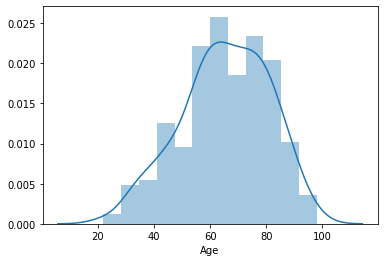

In [183]:
sns.distplot(df['Age'])


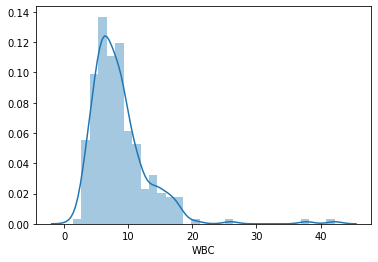

In [122]:
sns.distplot(df['WBC'])


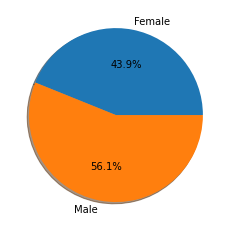

In [130]:
labels = 'Female', 'Male'
sizes = [df.loc[df['Sex'] == True].shape[0], df.loc[df['Sex'] == False].shape[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

Oxygen Requirement in 96 hours


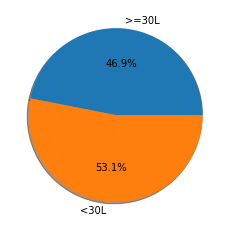

In [131]:
print('Oxygen Requirement in 96 hours')
labels = '>=30L ', '<30L'
sizes = [df.loc[df['Oxygen3'] == 1].shape[0], df.loc[df['Oxygen3'] == 0].shape[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

Death in 30 Days


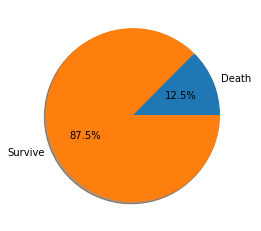

In [132]:
print('Death in 30 Days')
labels = 'Death ', 'Survive'
sizes = [df.loc[df['Death'] == 1].shape[0], df.loc[df['Death'] == 0].shape[0]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

       Survival        vs     Death in 30 days


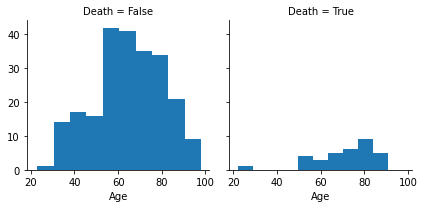

In [190]:
g = sns.FacetGrid(df, col="Death")
print("       Survival        vs     Death in 30 days")
g.map(plt.hist, "Age");

       Survival        vs     Death in 30 days


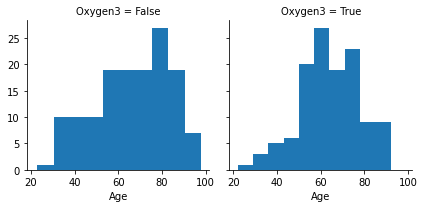

In [191]:
g = sns.FacetGrid(df, col="Oxygen3")
print("       Low Oxygen        vs     High Oxygen")
g.map(plt.hist, "Age");

       Low Oxygen        vs     High Oxygen


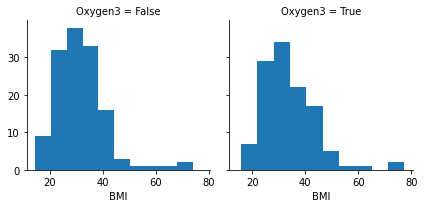

In [193]:
g = sns.FacetGrid(df, col="Oxygen3")
print("       Low Oxygen        vs     High Oxygen")
g.map(plt.hist, "BMI");

       Low Oxygen        vs     High Oxygen


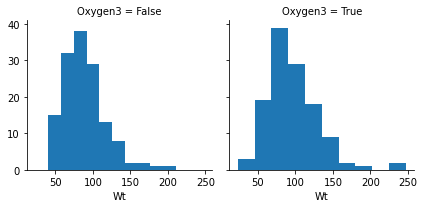

In [192]:
g = sns.FacetGrid(df, col="Oxygen3")
print("       Low Oxygen        vs     High Oxygen")
g.map(plt.hist, "Wt");

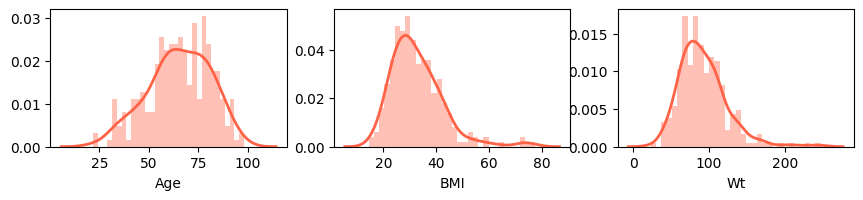

In [194]:
graphList = ['Age', 'BMI', 'Wt']
graphs = plt.figure(figsize=(25,20),dpi=100)
plt.subplots_adjust(hspace=1)
#plt.title('Patient Data Distributions')
for k in range(1,len(graphList) + 1):
    graphs.add_subplot(6,7,k)
    sns.distplot(df[graphList[k-1]], hist=True, kde=True, bins=int(len(df)/8), color = 'tomato', kde_kws={'linewidth': 2})
    #plt.ylabel('Frequency')
    #plt.title(graphList[k-1] + ' distribution')

In [134]:
df.loc(0)[4]
# get a sample patient data

Case #               5
Date          7/1/2020
Age                 66
Sex               True
Zip              95823
OSA              False
Sick             False
BMI              18.72
Wt               247.5
R                   20
RASat               83
Temp             100.8
Oxygen              30
OSat                98
WBC                6.2
ALT                 19
CRP                NaN
DDimer             NaN
Ferritin           NaN
LDH                NaN
Decadron          True
Remdesivir       False
Plasma           False
R2                  20
T2                97.9
Oxygen2             40
OSat2               95
WBC2               7.2
ALT2                18
CRP2              23.9
DDimer2            NaN
Ferritin2          184
LDH2               537
Oxygen3           True
Death            False
Name: 4, dtype: object

In [51]:
# convert string values to integers 0 and 1
# df['OSA'] = df['OSA'].map({'yes':1, 'no':0})
# df['Sick'] = df['Sick'].map({'yes':1, 'no':0})
# df['Decadron'] = df['Decadron'].map({'yes':1, 'no':0})
# df['Remdesivir'] = df['Remdesivir'].map({'yes':1, 'no':0})
# df['Plasma'] = df['Plasma'].map({'yes':1, 'no':0})


" df['OSA'] = df['OSA'].map({'yes':1, 'no':0})\ndf['Sick'] = df['Sick'].map({'yes':1, 'no':0})\ndf['Decadron'] = df['Decadron'].map({'yes':1, 'no':0})\ndf['Remdesivir'] = df['Remdesivir'].map({'yes':1, 'no':0})\ndf['Plasma'] = df['Plasma'].map({'yes':1, 'no':0})\n"

In [158]:
print("Total number of Deaths:")
print(len(df.loc[df['Death'] == 1]))
print("")
print("Total number of Deaths: " + str(len(df.loc[df['Death'] == 1])))
print("Total Cases: " + str(len(df)))



Total number of Deaths:
33

Total number of Deaths: 33
Total Cases: 263


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Case #      263 non-null    object 
 1   Date        263 non-null    object 
 2   Age         263 non-null    float64
 3   Sex         263 non-null    bool   
 4   Zip         263 non-null    float64
 5   OSA         263 non-null    bool   
 6   Sick        263 non-null    bool   
 7   BMI         254 non-null    float64
 8   Wt          263 non-null    float64
 9   R           263 non-null    float64
 10  RASat       263 non-null    float64
 11  Temp        262 non-null    float64
 12  Oxygen      261 non-null    float64
 13  OSat        261 non-null    float64
 14  WBC         261 non-null    float64
 15  ALT         241 non-null    float64
 16  CRP         223 non-null    float64
 17  DDimer      229 non-null    float64
 18  Ferritin    204 non-null    float64
 19  LDH         196 non-null    f

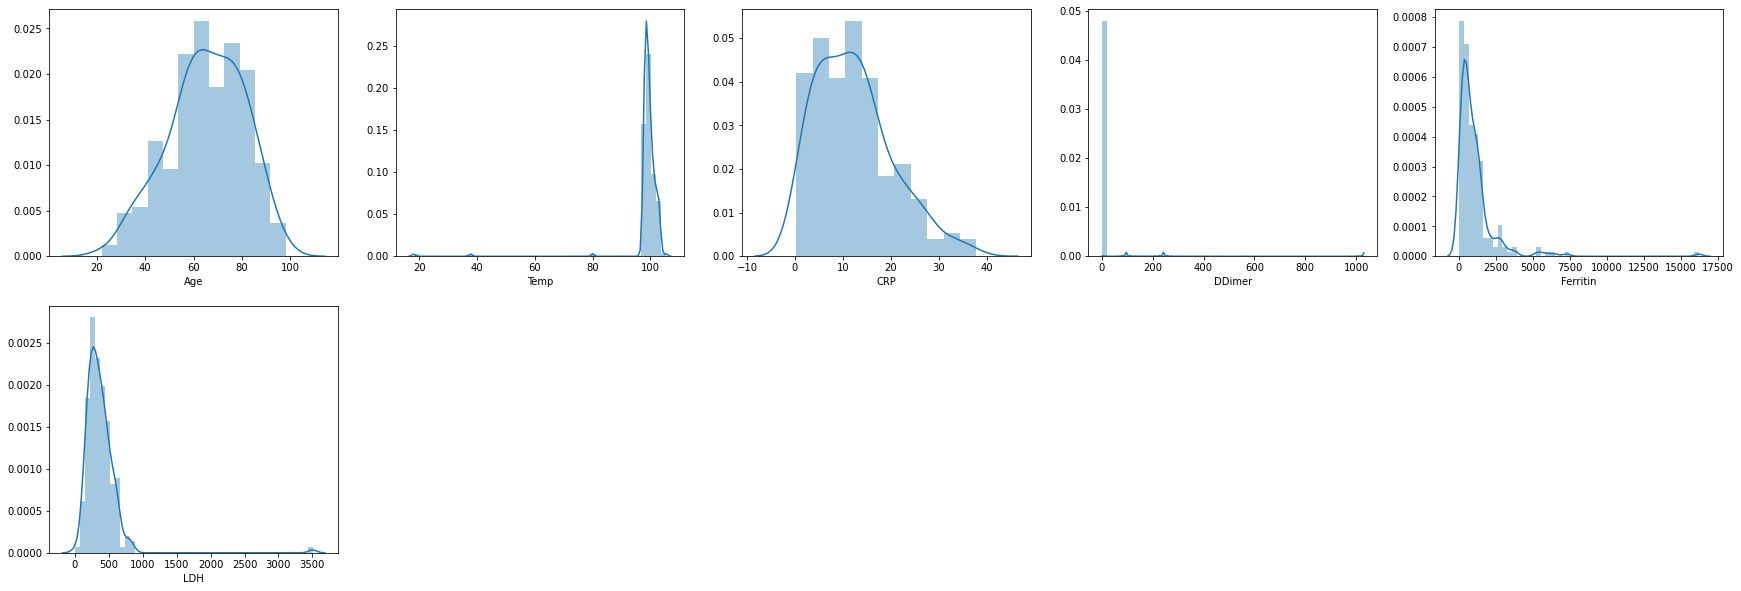

In [ ]:
fig = plt.figure(figsize=(30,10))
fig.add_subplot(2,5,1)
sns.distplot(df['Age'])
fig.add_subplot(2,5,2)
sns.distplot(df['Temp'])
fig.add_subplot(2,5,3)
sns.distplot(df['CRP'])
fig.add_subplot(2,5,4)
sns.distplot(df['DDimer'])
fig.add_subplot(2,5,5)
sns.distplot(df['Ferritin'])
fig.add_subplot(2,5,6)
sns.distplot(df['LDH'])


KeyError: 'Temp2'

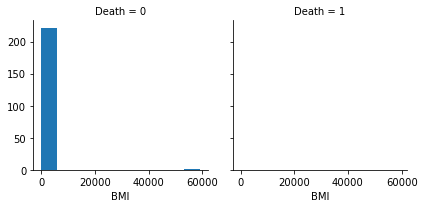

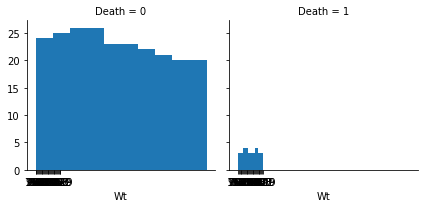

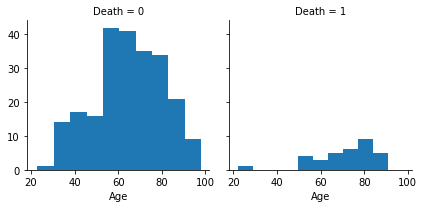

In [ ]:
g = sns.FacetGrid(df, col="Death")
g.map(plt.hist, "BMI");

g = sns.FacetGrid(df, col="Death")
g.map(plt.hist, "Wt");

g = sns.FacetGrid(df, col="Death")
g.map(plt.hist, "Age");

In [22]:
import tensorflow as tf
